# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [3]:
df=pd.read_csv('data/grades.csv')

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
df.head(5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [6]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

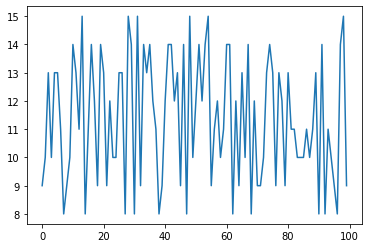

In [7]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

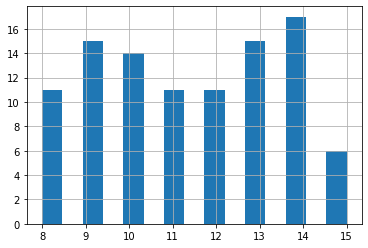

In [8]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [9]:
df.國文.mean()

11.39

算標準差。

In [10]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [11]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [12]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


In [14]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [15]:
df['總級分']=df.sum(axis=1)
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

In [16]:
df['加權']=df.國文+df.英文+df.數學*2
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [17]:
df.sort_values(by='總級分',ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [44]:
df2=df.sort_values(by=['加權','總級分'],ascending=False)

In [45]:
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,51,36
84,胡凱琳,10,8,9,9,15,51,36
32,林建亨,9,11,8,8,11,47,36
18,梁慧君,9,8,8,8,12,45,33


### 【重點】重設 index

In [46]:
df2=df2.reset_index(drop=True)
# df2.index=range(1,101)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,吳志遠,13,15,15,8,8,59,58
1,胡淳茜,12,15,14,13,11,65,55
2,詹威德,12,13,15,10,14,64,55
3,蔡亦瑄,13,13,14,13,12,65,54
4,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
95,陳上紫,10,10,8,9,14,51,36
96,胡凱琳,10,8,9,9,15,51,36
97,林建亨,9,11,8,8,11,47,36
98,梁慧君,9,8,8,8,12,45,33


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [47]:
df2[df2['數學']==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,吳志遠,13,15,15,8,8,59,58
2,詹威德,12,13,15,10,14,64,55
4,李士賢,10,14,15,13,13,65,54
6,曾怡君,11,12,15,13,14,65,53
9,林哲法,14,9,15,10,14,62,53
12,陳竹伯,10,12,15,10,14,61,52
14,葉儀依,9,13,15,8,14,59,52
17,周育霖,9,12,15,13,12,61,51
20,張雅彬,10,11,15,12,8,56,51
21,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [53]:
df2[(df2['數學']==15) & (df2['英文']==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [54]:
df2=df2.drop('總級分',axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權
0,吳志遠,13,15,15,8,8,58
1,胡淳茜,12,15,14,13,11,55
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
4,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
95,陳上紫,10,10,8,9,14,36
96,胡凱琳,10,8,9,9,15,36
97,林建亨,9,11,8,8,11,36
98,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [55]:
df2['test']=''
df2

,姓名,國文,英文,數學,自然,社會,加權,test
0,吳志遠,13,15,15,8,8,58,
1,胡淳茜,12,15,14,13,11,55,
2,詹威德,12,13,15,10,14,55,
3,蔡亦瑄,13,13,14,13,12,54,
4,李士賢,10,14,15,13,13,54,
...,...,...,...,...,...,...,...,...
95,陳上紫,10,10,8,9,14,36,
96,胡凱琳,10,8,9,9,15,36,
97,林建亨,9,11,8,8,11,36,
98,梁慧君,9,8,8,8,12,33,


In [56]:
df2.drop('test',axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
0,吳志遠,13,15,15,8,8,58
1,胡淳茜,12,15,14,13,11,55
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
4,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
95,陳上紫,10,10,8,9,14,36
96,胡凱琳,10,8,9,9,15,36
97,林建亨,9,11,8,8,11,36
98,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [59]:
df2.drop(0,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,胡淳茜,12,15,14,13,11,55
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
4,李士賢,10,14,15,13,13,54
5,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
95,陳上紫,10,10,8,9,14,36
96,胡凱琳,10,8,9,9,15,36
97,林建亨,9,11,8,8,11,36
98,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [71]:
df2.drop(df2[df2.姓名=='胡淳茜'].index,axis=0,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
4,李士賢,10,14,15,13,13,54
5,童心怡,13,13,14,8,13,54
6,曾怡君,11,12,15,13,14,53
...,...,...,...,...,...,...,...
95,陳上紫,10,10,8,9,14,36
96,胡凱琳,10,8,9,9,15,36
97,林建亨,9,11,8,8,11,36
98,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [74]:
import pandas_datareader as pdr
df=pdr.get_data_yahoo('2330.TW')
# df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [75]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-16,190.0,188.0,188.0,190.0,31507000.0,161.668976
2017-03-17,191.5,189.0,189.5,191.5,33764000.0,162.945312
2017-03-20,191.5,189.5,191.5,191.5,16215000.0,162.945312
2017-03-21,195.0,191.5,192.0,195.0,32246000.0,165.923416
2017-03-22,193.5,191.5,192.5,193.5,27396000.0,164.647079
...,...,...,...,...,...,...
2022-03-09,573.0,567.0,567.0,568.0,52155415.0,568.000000
2022-03-10,589.0,582.0,585.0,587.0,45630467.0,587.000000
2022-03-11,582.0,574.0,581.0,575.0,38943098.0,575.000000


#### 只要最後 300 個交易日!

In [76]:
df[-300:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-15,510.0,504.0,507.0,504.0,39852366.0,492.906433
2020-12-16,515.0,507.0,509.0,512.0,52012348.0,500.730377
2020-12-17,515.0,508.0,515.0,508.0,38215179.0,499.256195
2020-12-18,512.0,507.0,508.0,510.0,39924864.0,501.221741
2020-12-21,517.0,508.0,512.0,516.0,34813281.0,507.118469
...,...,...,...,...,...,...
2022-03-09,573.0,567.0,567.0,568.0,52155415.0,568.000000
2022-03-10,589.0,582.0,585.0,587.0,45630467.0,587.000000
2022-03-11,582.0,574.0,581.0,575.0,38943098.0,575.000000


#### 20 日的移動平均

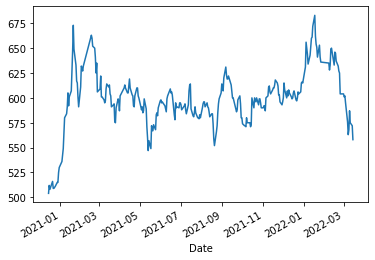

In [88]:
# 注意以下的.Close不是function，只是單純的df內的欄位
df[-300:].Close.plot()

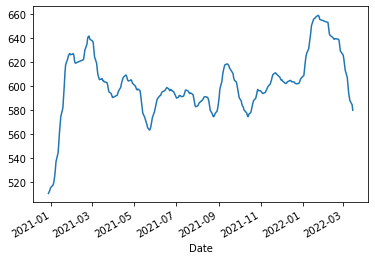

In [84]:
df[-300:].Close.rolling(10).mean().plot()

#### 20 日和 60 日的移動平均

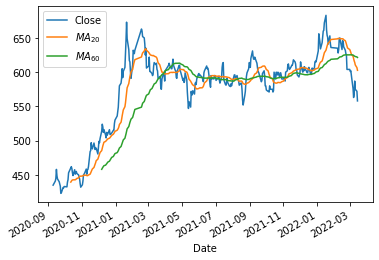

In [86]:
df[-365:].Close.plot(legend=True)
df[-365:].Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df[-365:].Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [89]:
close=df.Close.values
len(close)

1217

In [90]:
x=close[:-1]
len(x)

1216

In [91]:
y=close[1:]
len(y)

1216

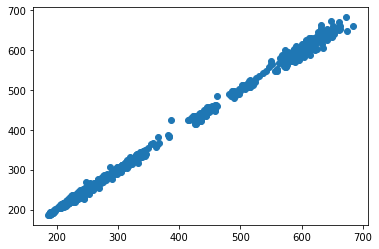

In [92]:
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [3]:
mydata = np.random.randn(4,3)

In [4]:
mydata

array([[ 0.20575605, -0.90455498, -0.24885675],
       [-0.28130574,  1.21970504,  0.99473652],
       [ 2.0125263 , -1.54517928, -0.00336266],
       [-0.95740071,  1.07301327, -1.48056607]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [5]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [6]:
df2

,A,B,C
0,0.205756,-0.904555,-0.248857
1,-0.281306,1.219705,0.994737
2,2.012526,-1.545179,-0.003363
3,-0.957401,1.073013,-1.480566


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [7]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [8]:
df3

,A,B,C
0,0.922795,0.539027,-1.206049
1,-0.815627,2.823507,0.317000
2,-1.209660,-1.238489,0.842525


In [12]:
df4=pd.concat([df2,df3],axis=0)

In [13]:
df4

,A,B,C
0,0.205756,-0.904555,-0.248857
1,-0.281306,1.219705,0.994737
2,2.012526,-1.545179,-0.003363
3,-0.957401,1.073013,-1.480566
0,0.922795,0.539027,-1.206049
1,-0.815627,2.823507,0.317000
2,-1.209660,-1.238489,0.842525


前面我們弄得亂七八糟的 index 重設一下。

In [16]:
df4=df4.reset_index(drop=True)

In [17]:
df4

,A,B,C
0,0.205756,-0.904555,-0.248857
1,-0.281306,1.219705,0.994737
2,2.012526,-1.545179,-0.003363
3,-0.957401,1.073013,-1.480566
4,0.922795,0.539027,-1.206049
5,-0.815627,2.823507,0.317000
6,-1.209660,-1.238489,0.842525


#### 横向的貼

In [19]:
df5=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [20]:
df5

,A,B,C,A,B,C
0,0.205756,-0.904555,-0.248857,0.922795,0.539027,-1.206049
1,-0.281306,1.219705,0.994737,-0.815627,2.823507,0.317000
2,2.012526,-1.545179,-0.003363,-1.209660,-1.238489,0.842525
3,-0.957401,1.073013,-1.480566,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [24]:
df_names=pd.read_csv('data/names.csv',names=['姓名'])

In [25]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [26]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [27]:
df_grades

,國文,英文,數學,社會,自然
0,6,15,9,9,11
1,6,6,6,15,9
2,13,15,11,12,7
3,15,7,9,14,8
4,7,11,7,10,15
...,...,...,...,...,...
95,13,7,11,6,11
96,8,10,14,13,13
97,9,6,7,10,11
98,10,8,9,8,12


In [28]:
df_score=pd.concat([df_names,df_grades],axis=1)
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,6,15,9,9,11
1,王紹尹,6,6,6,15,9
2,黃季坤,13,15,11,12,7
3,許正書,15,7,9,14,8
4,張鈞蓮,7,11,7,10,15
...,...,...,...,...,...,...
95,陳君生,13,7,11,6,11
96,曾桂甫,8,10,14,13,13
97,林欣怡,9,6,7,10,11
98,林佳霖,10,8,9,8,12


In [31]:
df_score.to_csv('data/df_score.csv',index=False)

In [32]:
test=pd.read_csv('data/df_score.csv')
test

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,6,15,9,9,11
1,王紹尹,6,6,6,15,9
2,黃季坤,13,15,11,12,7
3,許正書,15,7,9,14,8
4,張鈞蓮,7,11,7,10,15
...,...,...,...,...,...,...
95,陳君生,13,7,11,6,11
96,曾桂甫,8,10,14,13,13
97,林欣怡,9,6,7,10,11
98,林佳霖,10,8,9,8,12
